In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# ID number
# 2) Diagnosis (M = malignant, B = benign)
# 3-32)

# Ten real-valued features are computed for each cell nucleus:

# 	a) radius (mean of distances from center to points on the perimeter)
# 	b) texture (standard deviation of gray-scale values)
# 	c) perimeter
# 	d) area
# 	e) smoothness (local variation in radius lengths)
# 	f) compactness (perimeter^2 / area - 1.0)
# 	g) concavity (severity of concave portions of the contour)
# 	h) concave points (number of concave portions of the contour)
# 	i) symmetry 
# 	j) fractal dimension ("coastline approximation" - 1)

# The mean, standard error, and "worst" or largest (mean of the three
# largest values) of these features were computed for each image,
# resulting in 30 features.  For instance, field 3 is Mean Radius, field
# 13 is Radius SE, field 23 is Worst Radius.
l1=['radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave points',
 'symmetry',
 'fractal dimension']

l2=[]
for i in l1:
    l2.append(i+'_mean')
for i in l1:
    l2.append(i+'_SE')
for i in l1:
    l2.append(i+'_worst')
l1=['ID number','Diagnosis']
l1.extend(l2)
l1

['ID number',
 'Diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal dimension_mean',
 'radius_SE',
 'texture_SE',
 'perimeter_SE',
 'area_SE',
 'smoothness_SE',
 'compactness_SE',
 'concavity_SE',
 'concave points_SE',
 'symmetry_SE',
 'fractal dimension_SE',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal dimension_worst']

In [3]:
df=pd.read_csv('wdbc.csv',names=l1)

In [4]:
df.head()

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID number                569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal dimension_mean   569 non-null    float64
 12  radius_SE                569 non-null    float64
 13  texture_SE               569 non-null    float64
 14  perimeter_SE             5

In [7]:
df.isna().sum()

ID number                  0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal dimension_mean     0
radius_SE                  0
texture_SE                 0
perimeter_SE               0
area_SE                    0
smoothness_SE              0
compactness_SE             0
concavity_SE               0
concave points_SE          0
symmetry_SE                0
fractal dimension_SE       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal dimension_worst    0
dtype: int64

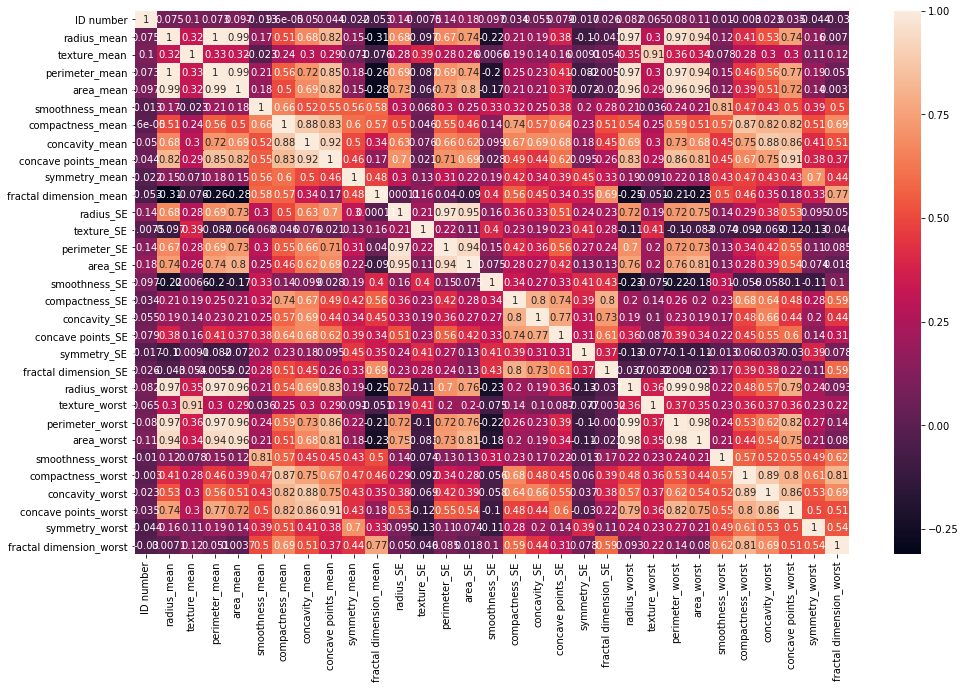

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

# Preparing Model

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=df.drop(columns=['ID number','Diagnosis'])

In [11]:
y=df.Diagnosis

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=23)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf = LogisticRegression(random_state=0,max_iter=5000).fit(x_train,y_train)

In [15]:
clf.predict(x_train)

array(['B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M

In [16]:
clf.predict_proba(x_test)

array([[9.93567886e-01, 6.43211368e-03],
       [2.38869703e-01, 7.61130297e-01],
       [4.83638336e-07, 9.99999516e-01],
       [9.58362580e-01, 4.16374203e-02],
       [3.21730826e-03, 9.96782692e-01],
       [1.15150536e-05, 9.99988485e-01],
       [1.21223509e-07, 9.99999879e-01],
       [9.54295573e-01, 4.57044273e-02],
       [9.96447823e-01, 3.55217696e-03],
       [6.02118361e-05, 9.99939788e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.99997638e-01, 2.36241848e-06],
       [9.92546015e-01, 7.45398502e-03],
       [9.99968310e-01, 3.16902760e-05],
       [9.98709408e-01, 1.29059224e-03],
       [9.99064801e-01, 9.35198942e-04],
       [9.99123971e-01, 8.76028692e-04],
       [7.74767108e-01, 2.25232892e-01],
       [7.65893365e-07, 9.99999234e-01],
       [9.93825400e-01, 6.17460021e-03],
       [9.90161530e-01, 9.83846950e-03],
       [9.81856319e-01, 1.81436814e-02],
       [1.27906360e-05, 9.99987209e-01],
       [9.99021724e-01, 9.78275759e-04],
       [6.408068

In [17]:
clf.score(x_train,y_train)

0.9560439560439561

In [18]:
clf.score(x_test,y_test)

0.9649122807017544

# Fitting model on complete data

In [19]:
clf = LogisticRegression(random_state=0,max_iter=5000).fit(X,y)

In [20]:
clf.score(X,y)

0.9578207381370826